In [2]:
import pandas as pd
df_tweets_misinfo = pd.read_csv('C:/Users/jr24440/Downloads/twitter-map_Climate_Change_Misinformation.csv')

In [3]:
import pandas as pd
df_tweets = pd.read_csv('C:/Users/jr24440/Downloads/twitter-map_Climate_Change.csv')

In [4]:
import re
import pandas as pd

# Extended list of regex patterns for misinformation-related terms
misinfo_patterns = [
    r'fake\w*',         # matches "fake", "faked", "faking", etc.
    r'misinform\w*',    # matches "misinform", "misinformed", "misinformation", etc.
    r'hoax\w*',         # matches "hoax", "hoaxed", "hoaxes", etc.
    r'conspir\w*',      # matches "conspiracy", "conspiracies", etc.
    r'scam\w*',         # matches "scam", "scammed", "scamming", etc.
    r'false\w*',        # matches "false", "falsified", "falsehood", etc.
    r'rumor\w*',        # matches "rumor", "rumors", etc.
    r'fabricat\w*',     # matches "fabricate", "fabricated", "fabrication", etc.
    r'clickbait',       # matches "clickbait"
    r'propagan\w*',     # matches "propaganda", "propagandist", etc.
    r'decept\w*',       # matches "deception", "deceptive", etc.
    r'lie\w*',          # matches "lie", "lied", "lying", etc.
    r'myth\w*',         # matches "myth", "myths", etc.
    r'counterfeit\w*',  # matches "counterfeit", "counterfeiting", etc.
    r'bogus',          # matches "bogus"
    r'exaggerat\w*',    # matches "exaggerate", "exaggerated", etc.
    r'distort\w*',      # matches "distort", "distorted", etc.
    r'mislead\w*',      # matches "mislead", "misleading", etc.
    r'erroneous',       # matches "erroneous"
    r'impost\w*',       # matches "imposter", "impostor", etc.
    r'manipulat\w*',    # matches "manipulate", "manipulated", "manipulating", etc.
    r'unsubstantiat\w*' # matches "unsubstantiated", etc.
]

# Combine the patterns into one regex pattern, using the OR operator.
misinfo_regex = re.compile('|'.join(misinfo_patterns), re.IGNORECASE)

# Flag tweets if any of the misinformation patterns are found in the cleaned text.
df_tweets['misinfo_flag'] = df_tweets['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# Estimate count and proportion of tweets flagged as misinformation.
misinfo_count = df_tweets['misinfo_flag'].sum()
total_tweets = len(df_tweets)
print(f"Total tweets flagged as misinformation: {misinfo_count}")
print(f"Proportion of tweets flagged: {misinfo_count/total_tweets:.2%}")


Total tweets flagged as misinformation: 15049
Proportion of tweets flagged: 5.22%


In [5]:
import re
import pandas as pd

# Extended list of regex patterns for misinformation-related terms
misinfo_patterns = [
    r'fake\w*',         # matches "fake", "faked", "faking", etc.
    r'misinform\w*',    # matches "misinform", "misinformed", "misinformation", etc.
    r'hoax\w*',         # matches "hoax", "hoaxed", "hoaxes", etc.
    r'conspir\w*',      # matches "conspiracy", "conspiracies", etc.
    r'scam\w*',         # matches "scam", "scammed", "scamming", etc.
    r'false\w*',        # matches "false", "falsified", "falsehood", etc.
    r'rumor\w*',        # matches "rumor", "rumors", etc.
    r'fabricat\w*',     # matches "fabricate", "fabricated", "fabrication", etc.
    r'clickbait',       # matches "clickbait"
    r'propagan\w*',     # matches "propaganda", "propagandist", etc.
    r'decept\w*',       # matches "deception", "deceptive", etc.
    r'lie\w*',          # matches "lie", "lied", "lying", etc.
    r'myth\w*',         # matches "myth", "myths", etc.
    r'counterfeit\w*',  # matches "counterfeit", "counterfeiting", etc.
    r'bogus',          # matches "bogus"
    r'exaggerat\w*',    # matches "exaggerate", "exaggerated", etc.
    r'distort\w*',      # matches "distort", "distorted", etc.
    r'mislead\w*',      # matches "mislead", "misleading", etc.
    r'erroneous',       # matches "erroneous"
    r'impost\w*',       # matches "imposter", "impostor", etc.
    r'manipulat\w*',    # matches "manipulate", "manipulated", "manipulating", etc.
    r'unsubstantiat\w*' # matches "unsubstantiated", etc.
]

# Combine the patterns into one regex pattern, using the OR operator.
misinfo_regex = re.compile('|'.join(misinfo_patterns), re.IGNORECASE)

# Flag tweets if any of the misinformation patterns are found in the cleaned text.
df_tweets_misinfo['misinfo_flag'] = df_tweets_misinfo['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# Estimate count and proportion of tweets flagged as misinformation.
misinfo_count_misinfo = df_tweets_misinfo['misinfo_flag'].sum()
total_tweets_misinfo = len(df_tweets)
print(f"Total tweets flagged as misinformation: {misinfo_count_misinfo}")
print(f"Proportion of tweets flagged: {misinfo_count_misinfo/total_tweets_misinfo:.2%}")


Total tweets flagged as misinformation: 67949
Proportion of tweets flagged: 23.55%


              precision    recall  f1-score   support

           0       0.88      0.89      0.89     55201
           1       0.88      0.87      0.88     51040

    accuracy                           0.88    106241
   macro avg       0.88      0.88      0.88    106241
weighted avg       0.88      0.88      0.88    106241

Confusion Matrix:
[[49368  5833]
 [ 6576 44464]]
ROC AUC Score: 0.9542514811501926


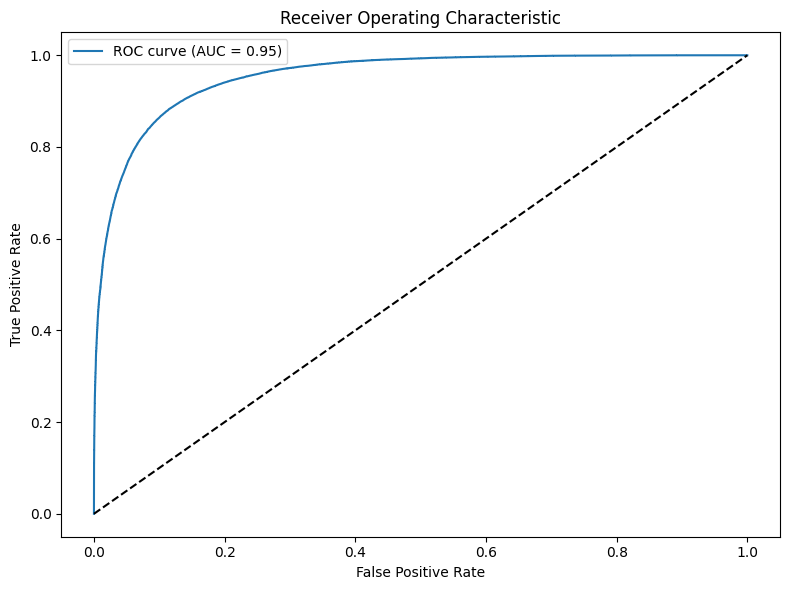

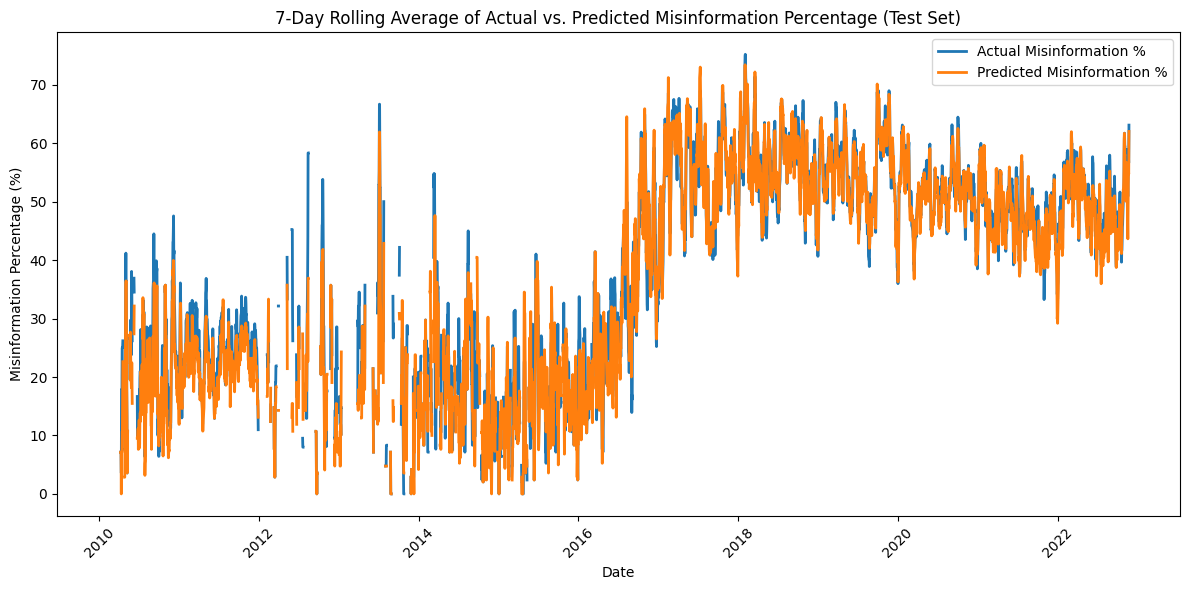

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Label the data: 0 for normal tweets, 1 for misinformation
df_tweets['label'] = 0
df_tweets_misinfo['label'] = 1

# Combine the datasets and drop duplicates based on 'text_cleaned'
df_all = pd.concat([df_tweets, df_tweets_misinfo], ignore_index=True)
df_all = df_all.drop_duplicates(subset='text_cleaned')

# Convert 'local_time' from milliseconds to datetime and create a 'date' column
df_all['date'] = pd.to_datetime(df_all['local_time'], unit='ms')

# Split the DataFrame into train and test sets while preserving the time information
df_train, df_test = train_test_split(df_all, test_size=0.2, random_state=42, stratify=df_all['label'])

# Feature extraction using TF-IDF (fit on training set, transform both)
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(df_train['text_cleaned'])
X_test = vectorizer.transform(df_test['text_cleaned'])
y_train = df_train['label']
y_test = df_test['label']

# Train a logistic regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # predicted probability for class 1

# Print detailed classification report
print(classification_report(y_test, y_pred))

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate ROC AUC score and plot ROC curve
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# --- Time Series Analysis ---

# Add predictions to the test DataFrame to preserve time information
df_test = df_test.copy()
df_test['y_pred'] = y_pred
df_test['y_proba'] = y_proba

# Group test data by day using the 'date' column.
df_test_daily = df_test.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    actual_misinfo=('label', 'sum'),
    predicted_misinfo=('y_pred', 'sum')
).reset_index()

# Calculate daily misinformation percentages (actual and predicted)
df_test_daily['actual_misinfo_percentage'] = 100 * df_test_daily['actual_misinfo'] / df_test_daily['total_tweets']
df_test_daily['predicted_misinfo_percentage'] = 100 * df_test_daily['predicted_misinfo'] / df_test_daily['total_tweets']

# Compute a 7-day rolling average to smooth the time series
df_test_daily['actual_roll'] = df_test_daily['actual_misinfo_percentage'].rolling(window=7, center=True).mean()
df_test_daily['predicted_roll'] = df_test_daily['predicted_misinfo_percentage'].rolling(window=7, center=True).mean()

# Plot the 7-day rolling averages of actual vs. predicted misinformation percentages over time
plt.figure(figsize=(12, 6))
plt.plot(df_test_daily['date'], df_test_daily['actual_roll'], label='Actual Misinformation %', linewidth=2)
plt.plot(df_test_daily['date'], df_test_daily['predicted_roll'], label='Predicted Misinformation %', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.title('7-Day Rolling Average of Actual vs. Predicted Misinformation Percentage (Test Set)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define regex patterns for dictionary-based labeling (using word stems)
misinfo_patterns = [
    r'fake\w*',         # matches "fake", "faked", "faking", etc.
    r'misinform\w*',    # matches "misinform", "misinformation", etc.
    r'hoax\w*',         # matches "hoax", "hoaxed", etc.
    r'conspir\w*',      # matches "conspiracy", "conspiracies", etc.
    r'scam\w*',         # matches "scam", "scammed", etc.
    r'false\w*',        # matches "false", "falsified", etc.
    r'rumor\w*',        # matches "rumor", "rumors", etc.
    r'fabricat\w*',     # matches "fabricate", "fabricated", etc.
    r'clickbait',       # matches "clickbait"
    r'propagan\w*',     # matches "propaganda", etc.
    r'decept\w*',       # matches "deception", "deceptive", etc.
    r'lie\w*',          # matches "lie", "lied", "lying", etc.
    r'myth\w*',         # matches "myth", "myths", etc.
    r'counterfeit\w*',  # matches "counterfeit", etc.
    r'bogus',           # matches "bogus"
    r'exaggerat\w*',    # matches "exaggerate", "exaggerated", etc.
    r'distort\w*',      # matches "distort", "distorted", etc.
    r'mislead\w*',      # matches "mislead", "misleading", etc.
    r'erroneous',       # matches "erroneous"
    r'impost\w*',       # matches "impostor", "imposter", etc.
    r'manipulat\w*',    # matches "manipulate", "manipulated", etc.
    r'unsubstantiat\w*' # matches "unsubstantiated", etc.
]
misinfo_regex = re.compile('|'.join(misinfo_patterns), re.IGNORECASE)

# --- Label tweets in each dataset using the dictionary method ---

# For the normal tweets dataset (df_tweets)
df_tweets['misinfo_flag'] = df_tweets['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# For the misinformation tweets dataset (df_tweets_misinfo)
df_tweets_misinfo['misinfo_flag'] = df_tweets_misinfo['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# --- Train a logistic classifier for each dataset using the dictionary labels ---

# For df_tweets (Normal Tweets)
print("Training Logistic Classifier on Normal Tweets Dataset (df_tweets)")
vectorizer_normal = TfidfVectorizer(stop_words='english')
X_normal = vectorizer_normal.fit_transform(df_tweets['text_cleaned'])
y_normal = df_tweets['misinfo_flag'].astype(int)  # Convert Boolean to integer

X_normal_train, X_normal_test, y_normal_train, y_normal_test = train_test_split(
    X_normal, y_normal, test_size=0.2, random_state=42, stratify=y_normal
)

clf_normal = LogisticRegression(max_iter=1000)
clf_normal.fit(X_normal_train, y_normal_train)
y_normal_pred = clf_normal.predict(X_normal_test)

print("Classification Report for Normal Tweets Dataset:")
print(classification_report(y_normal_test, y_normal_pred))

# For df_tweets_misinfo (Misinformation Tweets)
print("Training Logistic Classifier on Misinformation Tweets Dataset (df_tweets_misinfo)")
vectorizer_misinfo = TfidfVectorizer(stop_words='english')
X_misinfo = vectorizer_misinfo.fit_transform(df_tweets_misinfo['text_cleaned'])
y_misinfo = df_tweets_misinfo['misinfo_flag'].astype(int)

X_misinfo_train, X_misinfo_test, y_misinfo_train, y_misinfo_test = train_test_split(
    X_misinfo, y_misinfo, test_size=0.2, random_state=42, stratify=y_misinfo
)

clf_misinfo = LogisticRegression(max_iter=1000)
clf_misinfo.fit(X_misinfo_train, y_misinfo_train)
y_misinfo_pred = clf_misinfo.predict(X_misinfo_test)

print("Classification Report for Misinformation Tweets Dataset:")
print(classification_report(y_misinfo_test, y_misinfo_pred))


Training Logistic Classifier on Normal Tweets Dataset (df_tweets)
Classification Report for Normal Tweets Dataset:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     54685
           1       1.00      0.65      0.79      3010

    accuracy                           0.98     57695
   macro avg       0.99      0.83      0.89     57695
weighted avg       0.98      0.98      0.98     57695

Training Logistic Classifier on Misinformation Tweets Dataset (df_tweets_misinfo)
Classification Report for Misinformation Tweets Dataset:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     61091
           1       1.00      0.87      0.93     13590

    accuracy                           0.98     74681
   macro avg       0.99      0.94      0.96     74681
weighted avg       0.98      0.98      0.98     74681



Classification Report for Normal Tweets Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    273423
           1       1.00      0.73      0.85     15049

    accuracy                           0.99    288472
   macro avg       0.99      0.87      0.92    288472
weighted avg       0.99      0.99      0.99    288472

Classification Report for Misinformation Tweets Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    305455
           1       1.00      0.90      0.95     67949

    accuracy                           0.98    373404
   macro avg       0.99      0.95      0.97    373404
weighted avg       0.98      0.98      0.98    373404



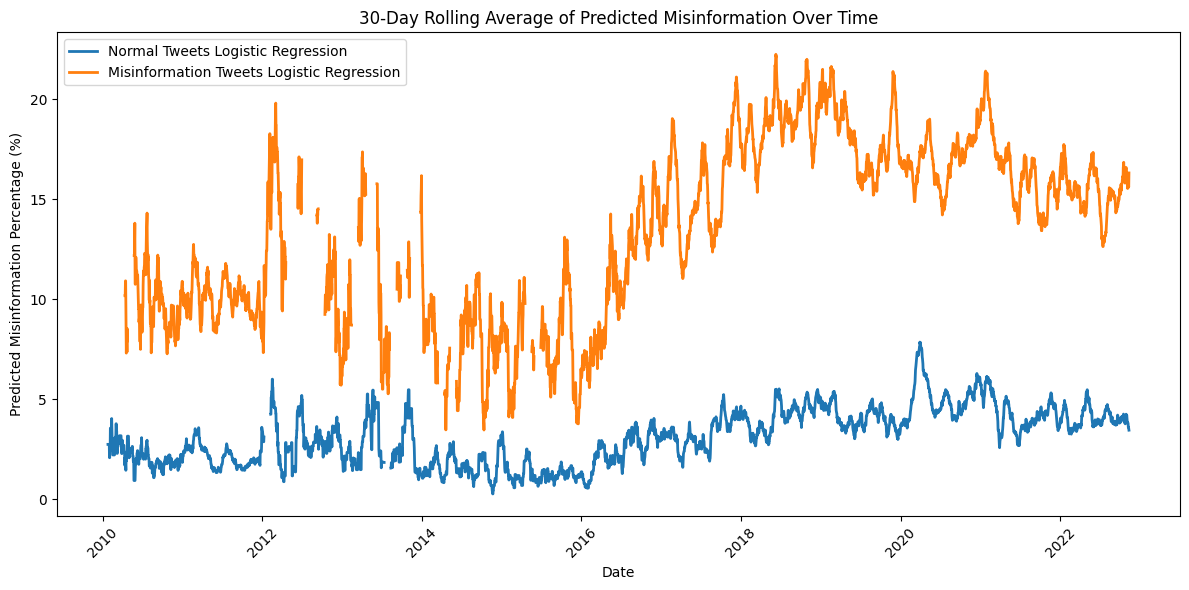

In [10]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# --- Step 1: Dictionary-based Labeling using Regex ---

# Define regex patterns for various word stems related to misinformation
misinfo_patterns = [
    r'fake\w*',         # matches "fake", "faked", "faking", etc.
    r'misinform\w*',    # matches "misinform", "misinformed", "misinformation", etc.
    r'hoax\w*',         # matches "hoax", "hoaxed", etc.
    r'conspir\w*',      # matches "conspiracy", "conspiracies", etc.
    r'scam\w*',         # matches "scam", "scammed", etc.
    r'false\w*',        # matches "false", "falsified", etc.
    r'rumor\w*',        # matches "rumor", "rumors", etc.
    r'fabricat\w*',     # matches "fabricate", "fabricated", "fabrication", etc.
    r'clickbait',       # matches "clickbait"
    r'propagan\w*',     # matches "propaganda", etc.
    r'decept\w*',       # matches "deception", "deceptive", etc.
    r'lie\w*',          # matches "lie", "lied", "lying", etc.
    r'myth\w*',         # matches "myth", "myths", etc.
    r'counterfeit\w*',  # matches "counterfeit", etc.
    r'bogus',           # matches "bogus"
    r'exaggerat\w*',    # matches "exaggerate", "exaggerated", etc.
    r'distort\w*',      # matches "distort", "distorted", etc.
    r'mislead\w*',      # matches "mislead", "misleading", etc.
    r'erroneous',       # matches "erroneous"
    r'impost\w*',       # matches "impostor", "imposter", etc.
    r'manipulat\w*',    # matches "manipulate", "manipulated", etc.
    r'unsubstantiat\w*' # matches "unsubstantiated", etc.
]
misinfo_regex = re.compile('|'.join(misinfo_patterns), re.IGNORECASE)

# Apply the dictionary-based labeling to each dataset
df_tweets['misinfo_flag'] = df_tweets['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))
df_tweets_misinfo['misinfo_flag'] = df_tweets_misinfo['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# --- Step 2: Train Logistic Regression Classifiers Separately ---

# For df_tweets (Normal Tweets Dataset)
vectorizer_normal = TfidfVectorizer(stop_words='english')
X_normal = vectorizer_normal.fit_transform(df_tweets['text_cleaned'])
y_normal = df_tweets['misinfo_flag'].astype(int)
clf_normal = LogisticRegression(max_iter=1000)
clf_normal.fit(X_normal, y_normal)

# Print classification report for the normal tweets model (using all available data)
print("Classification Report for Normal Tweets Logistic Regression:")
print(classification_report(y_normal, clf_normal.predict(X_normal)))

# For df_tweets_misinfo (Misinformation Tweets Dataset)
vectorizer_misinfo = TfidfVectorizer(stop_words='english')
X_misinfo = vectorizer_misinfo.fit_transform(df_tweets_misinfo['text_cleaned'])
y_misinfo = df_tweets_misinfo['misinfo_flag'].astype(int)
clf_misinfo = LogisticRegression(max_iter=1000)
clf_misinfo.fit(X_misinfo, y_misinfo)

# Print classification report for the misinformation tweets model (using all available data)
print("Classification Report for Misinformation Tweets Logistic Regression:")
print(classification_report(y_misinfo, clf_misinfo.predict(X_misinfo)))

# --- Step 3: Predict Using the Logistic Classifiers to Obtain Time Series Data ---

# Process Normal Tweets Dataset
df_tweets['y_pred'] = clf_normal.predict(X_normal)
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')
df_normal_daily = df_tweets.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_pred=('y_pred', 'sum')
).reset_index()
df_normal_daily['predicted_percentage'] = 100.0 * df_normal_daily['misinfo_pred'] / df_normal_daily['total_tweets']
df_normal_daily['roll'] = df_normal_daily['predicted_percentage'].rolling(window=30, center=True).mean()

# Process Misinformation Tweets Dataset
df_tweets_misinfo['y_pred'] = clf_misinfo.predict(X_misinfo)
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')
df_misinfo_daily = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_pred=('y_pred', 'sum')
).reset_index()
df_misinfo_daily['predicted_percentage'] = 100.0 * df_misinfo_daily['misinfo_pred'] / df_misinfo_daily['total_tweets']
df_misinfo_daily['roll'] = df_misinfo_daily['predicted_percentage'].rolling(window=30, center=True).mean()

# --- Step 4: Plot the Time Series of Predicted Misinformation Percentage Over Time ---

plt.figure(figsize=(12, 6))
plt.plot(df_normal_daily['date'], df_normal_daily['roll'], label='Normal Tweets Logistic Regression', linewidth=2)
plt.plot(df_misinfo_daily['date'], df_misinfo_daily['roll'], label='Misinformation Tweets Logistic Regression', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Predicted Misinformation Percentage (%)')
plt.title('30-Day Rolling Average of Predicted Misinformation Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
print(df_all.head())

                                        text_cleaned  retweet_count  \
0  DEFCON 5: “We have an imperative to build a ‘p...           4620   
1                                Its all happening .           1638   
2  The United States receives no oil from Lybia. ...           1700   
3  The moon is in Aries and it is full. People ar...           3051   
4  energy flows where our intention goes.... CREA...          10464   

                                                text    local_time  \
0  DEFCON 5: “We have an imperative to build a ‘p...  1.593780e+12   
1                                Its all happening .  1.422300e+12   
2  The United States receives no oil from Lybia. ...  1.299520e+12   
3  The moon is in Aries and it is full. People ar...  1.507180e+12   
4  energy flows where our intention goes.... CREA...  1.344960e+12   

                                             tweetId   id_  misinfo_flag  \
0  http://twitter.com/i/web/status/12790213512868...  BFVo         False   


        date  total_tweets  misinfo_tweets  misinfo_percentage
0 2009-11-18             1               0                 0.0
1 2009-11-19             4               0                 0.0
2 2009-11-20             0               0                 NaN
3 2009-11-21             1               0                 0.0
4 2009-11-22             3               0                 0.0


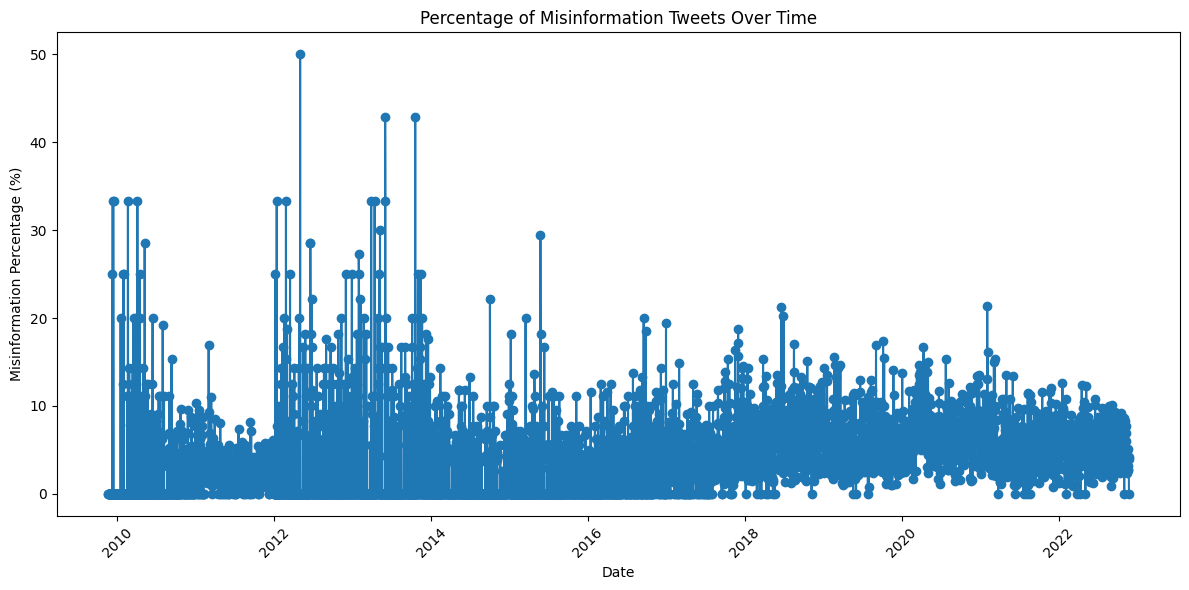

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'local_time' from milliseconds to a datetime object
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')

# Group by day using the new 'date' column.
df_daily = df_tweets.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_tweets=('misinfo_flag', 'sum')
).reset_index()

# Calculate the daily percentage of misinformation tweets.
df_daily['misinfo_percentage'] = 100 * df_daily['misinfo_tweets'] / df_daily['total_tweets']

# Display the first few rows of the aggregated DataFrame.
print(df_daily.head())

# Plot the percentage of misinformation tweets over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['misinfo_percentage'], marker='o', linestyle='-')
plt.title('Percentage of Misinformation Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


        date  total_tweets  misinfo_tweets  misinfo_percentage  \
0 2009-11-18             1               0                 0.0   
1 2009-11-19             4               0                 0.0   
2 2009-11-20             0               0                 NaN   
3 2009-11-21             1               0                 0.0   
4 2009-11-22             3               0                 0.0   

   misinfo_percentage_roll  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


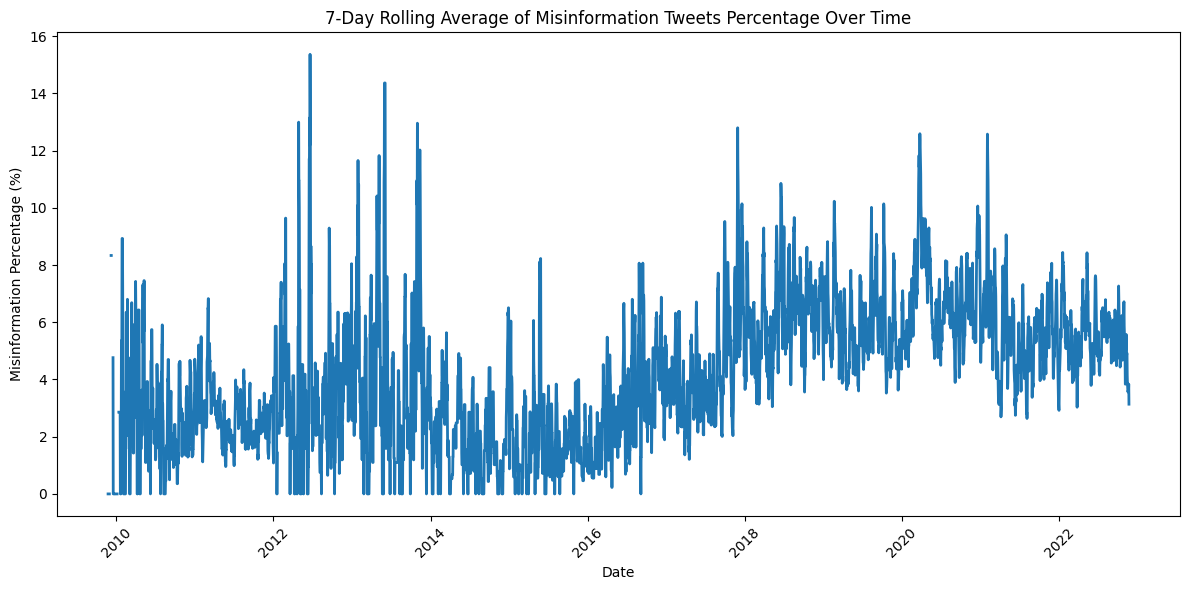

In [12]:
# Compute a 7-day rolling average for a smooth line plot.
df_daily['misinfo_percentage_roll'] = df_daily['misinfo_percentage'].rolling(window=7, center=True).mean()

# Display the first few rows of the aggregated DataFrame.
print(df_daily.head())

# Plot the 7-day rolling average of misinformation percentage over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['misinfo_percentage_roll'], linestyle='-', linewidth=2)
plt.title('7-Day Rolling Average of Misinformation Tweets Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

        date  total_tweets  misinfo_tweets  misinfo_percentage  \
0 2009-11-18             1               0                 0.0   
1 2009-11-19             4               0                 0.0   
2 2009-11-20             0               0                 NaN   
3 2009-11-21             1               0                 0.0   
4 2009-11-22             3               0                 0.0   

   misinfo_percentage_roll  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


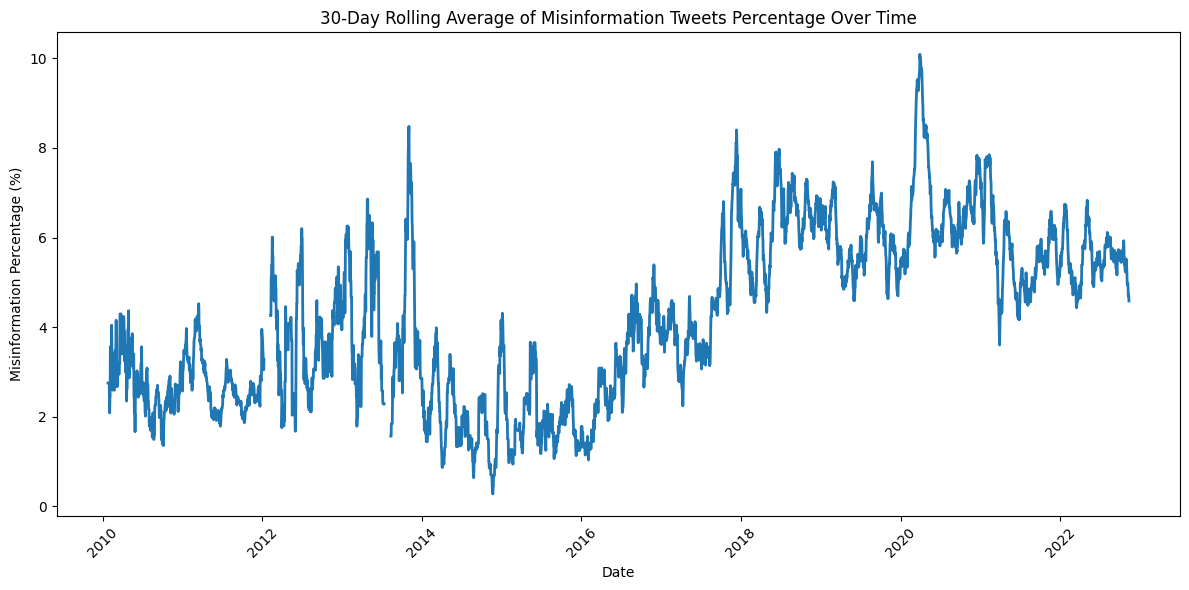

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'local_time' from milliseconds to a datetime object
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')

# Group by day using the new 'date' column.
df_daily = df_tweets.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_tweets=('misinfo_flag', 'sum')
).reset_index()

# Calculate the daily percentage of misinformation tweets.
df_daily['misinfo_percentage'] = 100 * df_daily['misinfo_tweets'] / df_daily['total_tweets']

# Compute a 30-day rolling average for a smooth line plot.
df_daily['misinfo_percentage_roll'] = df_daily['misinfo_percentage'].rolling(window=30, center=True).mean()

# Display the first few rows of the aggregated DataFrame.
print(df_daily.head())

# Plot the 30-day rolling average of misinformation percentage over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['misinfo_percentage_roll'], linestyle='-', linewidth=2)
plt.title('30-Day Rolling Average of Misinformation Tweets Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


        date  total_tweets_misinfo  misinfo_tweets_misinfo  misinfo_percentage
0 2009-11-19                     3                       0                 0.0
1 2009-11-20                     0                       0                 NaN
2 2009-11-21                     0                       0                 NaN
3 2009-11-22                     1                       0                 0.0
4 2009-11-23                     2                       0                 0.0


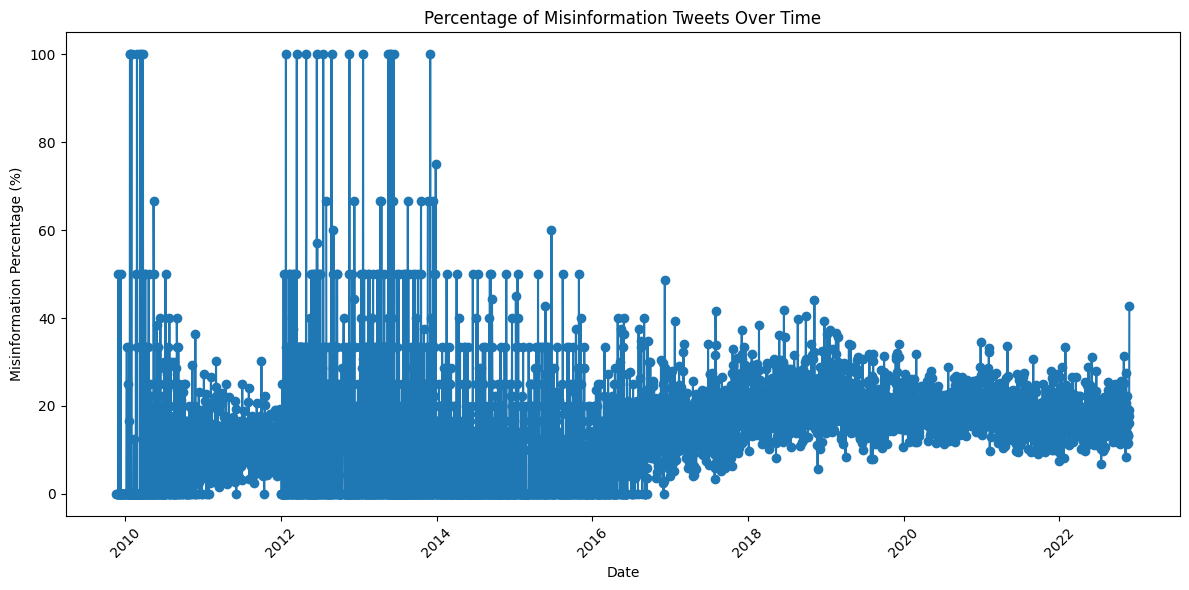

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'local_time' from milliseconds to a datetime object
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')

# Group by day using the new 'date' column.
df_daily_misinfo = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets_misinfo=('text_cleaned', 'size'),
    misinfo_tweets_misinfo=('misinfo_flag', 'sum')
).reset_index()

# Calculate the daily percentage of misinformation tweets.
df_daily_misinfo['misinfo_percentage'] = 100 * df_daily_misinfo['misinfo_tweets_misinfo'] / df_daily_misinfo['total_tweets_misinfo']

# Display the first few rows of the aggregated DataFrame.
print(df_daily_misinfo.head())

# Plot the percentage of misinformation tweets over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily_misinfo['date'], df_daily_misinfo['misinfo_percentage'], marker='o', linestyle='-')
plt.title('Percentage of Misinformation Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


        date  total_tweets_misinfo  misinfo_tweets_misinfo  \
0 2009-11-19                     3                       0   
1 2009-11-20                     0                       0   
2 2009-11-21                     0                       0   
3 2009-11-22                     1                       0   
4 2009-11-23                     2                       0   

   misinfo_percentage  misinfo_percentage_roll  
0                 0.0                      NaN  
1                 NaN                      NaN  
2                 NaN                      NaN  
3                 0.0                      NaN  
4                 0.0                      NaN  


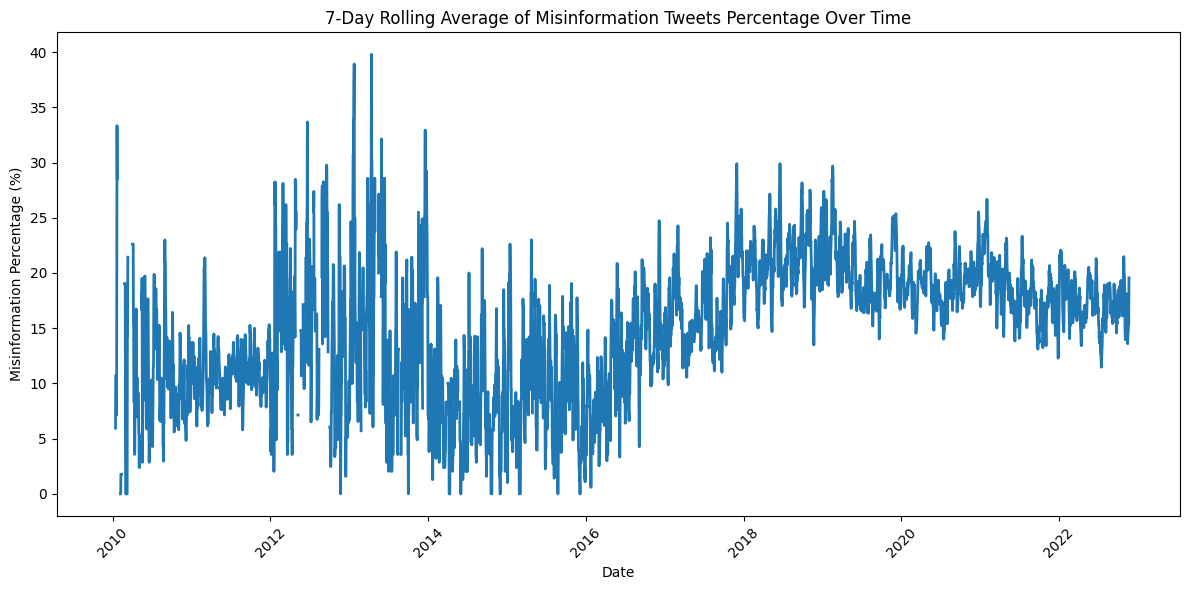

In [15]:
# Compute a 7-day rolling average for a smooth line plot.
df_daily_misinfo['misinfo_percentage_roll'] = df_daily_misinfo['misinfo_percentage'].rolling(window=7, center=True).mean()

# Display the first few rows of the aggregated DataFrame.
print(df_daily_misinfo.head())

# Plot the 7-day rolling average of misinformation percentage over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily_misinfo['date'], df_daily_misinfo['misinfo_percentage_roll'], linestyle='-', linewidth=2)
plt.title('7-Day Rolling Average of Misinformation Tweets Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

        date  total_tweets_misinfo  misinfo_tweets_misinfo  \
0 2009-11-19                     3                       0   
1 2009-11-20                     0                       0   
2 2009-11-21                     0                       0   
3 2009-11-22                     1                       0   
4 2009-11-23                     2                       0   

   misinfo_percentage  misinfo_percentage_roll  
0                 0.0                      NaN  
1                 NaN                      NaN  
2                 NaN                      NaN  
3                 0.0                      NaN  
4                 0.0                      NaN  


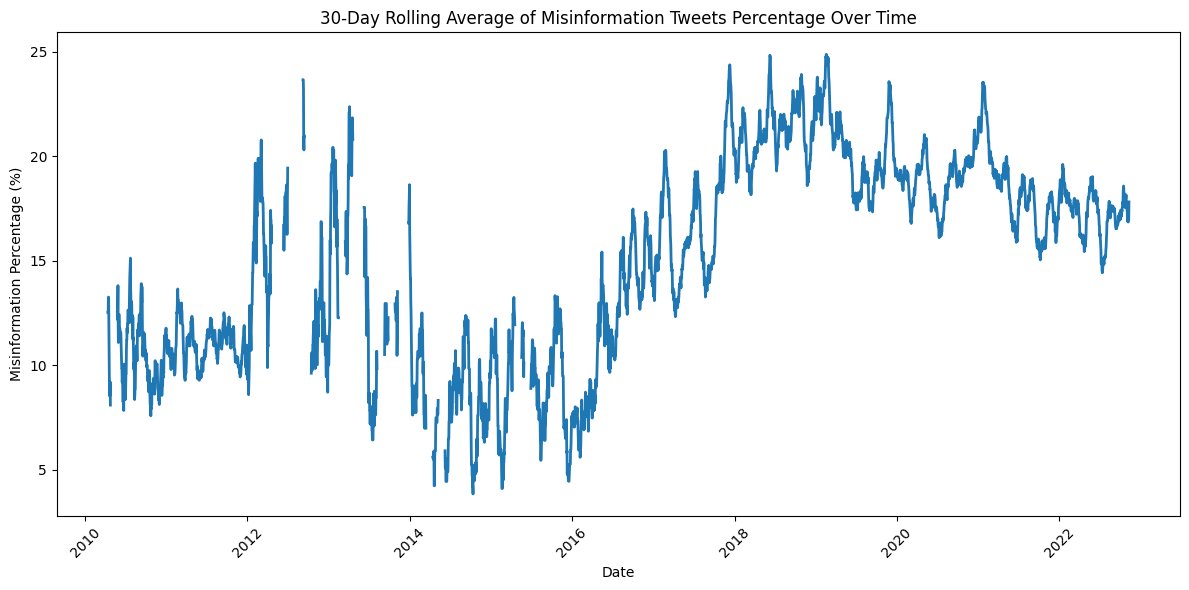

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'local_time' from milliseconds to a datetime object
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')

# Group by day using the new 'date' column.
df_daily_misinfo = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets_misinfo=('text_cleaned', 'size'),
    misinfo_tweets_misinfo=('misinfo_flag', 'sum')
).reset_index()

# Calculate the daily percentage of misinformation tweets.
df_daily_misinfo['misinfo_percentage'] = 100 * df_daily_misinfo['misinfo_tweets_misinfo'] / df_daily_misinfo['total_tweets_misinfo']

# Compute a 30-day rolling average for a smooth line plot.
df_daily_misinfo['misinfo_percentage_roll'] = df_daily_misinfo['misinfo_percentage'].rolling(window=30, center=True).mean()

# Display the first few rows of the aggregated DataFrame.
print(df_daily_misinfo.head())

# Plot the 30-day rolling average of misinformation percentage over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily_misinfo['date'], df_daily_misinfo['misinfo_percentage_roll'], linestyle='-', linewidth=2)
plt.title('30-Day Rolling Average of Misinformation Tweets Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
print(df_daily_misinfo.head())

        date  total_tweets_misinfo  misinfo_tweets_misinfo  \
0 2009-11-19                     3                       0   
1 2009-11-20                     0                       0   
2 2009-11-21                     0                       0   
3 2009-11-22                     1                       0   
4 2009-11-23                     2                       0   

   misinfo_percentage  misinfo_percentage_roll  
0                 0.0                      NaN  
1                 NaN                      NaN  
2                 NaN                      NaN  
3                 0.0                      NaN  
4                 0.0                      NaN  


In [18]:
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
from collections import Counter

# ----------------------------
# 1. Define a simple tokenizer
# ----------------------------
def simple_tokenizer(text):
    # Tokenize by extracting alphanumeric words and convert to lowercase
    return re.findall(r'\w+', text.lower())

# ----------------------------
# 2. Build a vocabulary
# ----------------------------
def build_vocab(texts, max_vocab_size=10000, specials=["<unk>", "<pad>"]):
    counter = Counter()
    for text in texts:
        tokens = simple_tokenizer(text)
        counter.update(tokens)
    # Most common tokens up to max_vocab_size (excluding specials)
    most_common = counter.most_common(max_vocab_size - len(specials))
    # Build vocab: reserve index 0 for <unk> and 1 for <pad>
    vocab = {}
    for idx, token in enumerate(specials):
        vocab[token] = idx
    for token, _ in most_common:
        if token not in vocab:
            vocab[token] = len(vocab)
    return vocab

# Build the vocabulary from your tweet texts
max_vocab_size = 10000
special_tokens = ["<unk>", "<pad>"]
vocab = build_vocab(df_all['text_cleaned'], max_vocab_size, specials=special_tokens)
pad_idx = vocab["<pad>"]

# ----------------------------
# 3. Create a Custom Dataset
# ----------------------------
class TweetDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_seq_length=100):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_seq_length = max_seq_length

    def tokenize_and_numericalize(self, text):
        tokens = simple_tokenizer(text)
        token_ids = [self.vocab.get(token, self.vocab["<unk>"]) for token in tokens]
        # Truncate to max_seq_length
        return token_ids[:self.max_seq_length]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        token_ids = self.tokenize_and_numericalize(self.texts[idx])
        # Return as torch tensor
        return torch.tensor(token_ids, dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.float)

# Create the dataset (assuming df_all has been defined)
max_seq_length = 100
dataset = TweetDataset(df_all['text_cleaned'].tolist(),
                       df_all['label'].tolist(),
                       vocab,
                       max_seq_length)

# ----------------------------
# 4. Define a Collate Function for Padding
# ----------------------------
def collate_batch(batch):
    token_ids_list, labels = zip(*batch)
    # Pad sequences so that all have the same length in a batch
    token_ids_padded = pad_sequence(token_ids_list, batch_first=True, padding_value=pad_idx)
    # If padded sequences exceed max_seq_length, trim them
    if token_ids_padded.size(1) > max_seq_length:
        token_ids_padded = token_ids_padded[:, :max_seq_length]
    labels = torch.stack(labels)
    return token_ids_padded, labels

# ----------------------------
# 5. Split into Training and Test Sets and Create DataLoaders
# ----------------------------
batch_size = 32
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

# ----------------------------
# 6. Define the LSTM Model
# ----------------------------
class LSTMMisinfoClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, pad_idx):
        super(LSTMMisinfoClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        embedded = self.embedding(x)  # (batch_size, seq_len, embed_dim)
        output, (hidden, cell) = self.lstm(embedded)
        # Use the last hidden state from the final LSTM layer
        hidden = hidden[-1]  # (batch_size, hidden_dim)
        out = self.fc(hidden)
        return self.sigmoid(out)

vocab_size = len(vocab)
embed_dim = 128
hidden_dim = 64
model = LSTMMisinfoClassifier(vocab_size, embed_dim, hidden_dim, output_dim=1, pad_idx=pad_idx)

# ----------------------------
# 7. Define Loss Function and Optimizer
# ----------------------------
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ----------------------------
# 8. Training Loop
# ----------------------------
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for texts, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(texts).squeeze(1)  # outputs: (batch_size)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * texts.size(0)
    avg_loss = epoch_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# ----------------------------
# 9. Evaluation on Test Set
# ----------------------------
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for texts, labels in test_loader:
        outputs = model(texts).squeeze(1)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * texts.size(0)
        predictions = (outputs >= 0.5).float()
        correct += (predictions == labels).sum().item()

avg_test_loss = test_loss / len(test_dataset)
accuracy = correct / len(test_dataset)
print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {accuracy:.4f}")


C:\Users\jr24440\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1/5, Loss: 0.3794
Epoch 2/5, Loss: 0.2615
Epoch 3/5, Loss: 0.2357
Epoch 4/5, Loss: 0.2157
Epoch 5/5, Loss: 0.1948
Test Loss: 0.2757, Test Accuracy: 0.8877


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for texts, labels in test_loader:
        outputs = model(texts).squeeze(1)
        preds = (outputs >= 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Precision: 0.8661, Recall: 0.9060, F1 Score: 0.8856


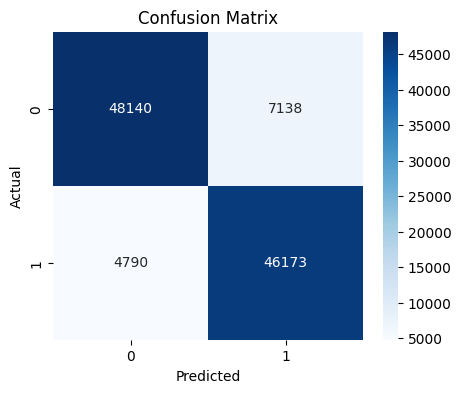

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0     0.8960    0.8889    0.8924     54989
         1.0     0.8818    0.8893    0.8855     51252

    accuracy                         0.8891    106241
   macro avg     0.8889    0.8891    0.8890    106241
weighted avg     0.8892    0.8891    0.8891    106241

Confusion Matrix:
[[48881  6108]
 [ 5674 45578]]
ROC AUC Score: 0.9589010319961297


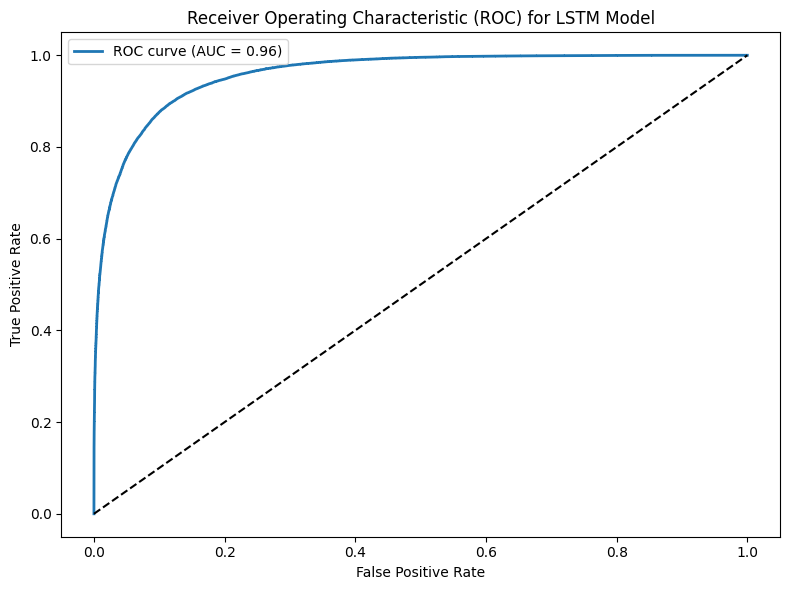

In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set the model to evaluation mode
model.eval()

# Containers for labels, predictions, and probabilities
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for texts, labels in test_loader:
        outputs = model(texts).squeeze(1)
        probs = outputs.detach().cpu().numpy()          # Predicted probabilities (for class 1)
        preds = (outputs >= 0.5).float().detach().cpu().numpy()  # Binary predictions
        all_probs.extend(probs.tolist())
        all_preds.extend(preds.tolist())
        all_labels.extend(labels.cpu().numpy().tolist())

# Compute additional statistics
print("Classification Report:")
print(classification_report(all_labels, all_preds, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

# Compute ROC AUC Score
roc_auc = roc_auc_score(all_labels, all_probs)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LSTM Model')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
sentiment = pd.read_excel("C:/Users/jr24440/Downloads/Sentiment_metric_index_full.xlsx")

In [22]:
print(sentiment.head())

        Date  Aggregate  cluster_Business Impact  \
0 2003-01-01   0.670882                 0.724689   
1 2003-02-01   0.599651                 0.681383   
2 2003-03-01   0.405426                 0.374329   
3 2003-04-01   0.438446                 0.436445   
4 2003-05-01   0.375706                 0.414676   

   cluster_Environmental Impact  cluster_Societal Debate  cluster_Research  \
0                      0.634144                 0.522989          0.540001   
1                      0.575126                 0.358989          0.517911   
2                      0.454074                 0.402151          0.322407   
3                      0.328511                 0.457464          0.335117   
4                      0.294991                 0.344434          0.262923   

   Agreements/Actions  Agriculture Shifts  Airline Industry  Arctic Wildlife  \
0            0.723770            0.579213          0.617377         0.473769   
1            0.711091            0.227526          0.49289

In [23]:
print(sentiment.describe())

                                Date   Aggregate  cluster_Business Impact  \
count                            258  258.000000               258.000000   
mean   2013-09-15 15:09:46.046511616    1.263964                 1.066897   
min              2003-01-01 00:00:00    0.268712                 0.276916   
25%              2008-05-08 18:00:00    0.840365                 0.735225   
50%              2013-09-16 00:00:00    1.108101                 1.009317   
75%              2019-01-24 06:00:00    1.674161                 1.308288   
max              2024-06-01 00:00:00    2.790996                 2.639918   
std                              NaN    0.563003                 0.432197   

       cluster_Environmental Impact  cluster_Societal Debate  \
count                    258.000000               258.000000   
mean                       1.261238                 1.223693   
min                        0.227101                 0.221174   
25%                        0.837008               

In [24]:
import pandas as pd

# Convert 'local_time' to datetime for both datasets
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')

# For the normal tweets dataset: group by day and compute counts
df_normal_daily = df_tweets.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_count=('misinfo_flag', 'sum')
).reset_index()

# Optionally, compute the daily percentage of tweets flagged as misinformation
df_normal_daily['misinfo_percentage'] = 100.0 * df_normal_daily['misinfo_count'] / df_normal_daily['total_tweets']

# For the misinformation tweets dataset: group by day and compute counts
df_misinfo_daily = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_count=('misinfo_flag', 'sum')
).reset_index()

# Optionally, compute the daily percentage of tweets flagged as misinformation
df_misinfo_daily['misinfo_percentage'] = 100.0 * df_misinfo_daily['misinfo_count'] / df_misinfo_daily['total_tweets']

# Display the first few rows of each aggregated DataFrame
print("Normal Tweets Daily Aggregation:")
print(df_normal_daily.head())

print("\nMisinformation Tweets Daily Aggregation:")
print(df_misinfo_daily.head())


Normal Tweets Daily Aggregation:
        date  total_tweets  misinfo_count  misinfo_percentage
0 2009-11-18             1              0                 0.0
1 2009-11-19             4              0                 0.0
2 2009-11-20             0              0                 NaN
3 2009-11-21             1              0                 0.0
4 2009-11-22             3              0                 0.0

Misinformation Tweets Daily Aggregation:
        date  total_tweets  misinfo_count  misinfo_percentage
0 2009-11-19             3              0                 0.0
1 2009-11-20             0              0                 NaN
2 2009-11-21             0              0                 NaN
3 2009-11-22             1              0                 0.0
4 2009-11-23             2              0                 0.0


In [25]:
import pandas as pd

# -----------------------------
# Process the External Sentiment Dataset
# -----------------------------
# Assume df_sentiment is already loaded and has a column named "Date".
sentiment['Date'] = pd.to_datetime(sentiment['Date'])
# Filter for data from 2012 onward.
sentiment = sentiment[sentiment['Date'] >= '2012-01-01']

# -----------------------------
# Process the Normal Tweets Dataset (df_tweets)
# -----------------------------
# Convert 'local_time' (in ms) to datetime.
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')
# Filter for tweets from 2012 onward.
df_tweets = df_tweets[df_tweets['date'] >= '2012-01-01']

# Group by month (using month start 'MS') to calculate total tweets and number flagged as misinformation.
df_normal_monthly = df_tweets.groupby(pd.Grouper(key='date', freq='MS')).agg(
    total_tweets_normal=('text_cleaned', 'size'),
    misinfo_count_normal=('misinfo_flag', 'sum')
).reset_index()

# Rename the datetime column to "Date" to facilitate merging.
df_normal_monthly.rename(columns={'date': 'Date'}, inplace=True)

# -----------------------------
# Process the Misinformation Tweets Dataset (df_tweets_misinfo)
# -----------------------------
# Convert 'local_time' (in ms) to datetime.
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')
# Filter for tweets from 2012 onward.
df_tweets_misinfo = df_tweets_misinfo[df_tweets_misinfo['date'] >= '2012-01-01']

# Group by month.
df_misinfo_monthly = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='MS')).agg(
    total_tweets_misinfo=('text_cleaned', 'size'),
    misinfo_count_misinfo=('misinfo_flag', 'sum')
).reset_index()

# Rename the datetime column to "Date" for merging.
df_misinfo_monthly.rename(columns={'date': 'Date'}, inplace=True)

# -----------------------------
# Merge the Datasets
# -----------------------------
# Merge df_sentiment with normal tweets monthly aggregation.
df_merged = pd.merge(sentiment, df_normal_monthly, on='Date', how='left')
# Merge the result with the misinformation tweets monthly aggregation.
df_merged = pd.merge(df_merged, df_misinfo_monthly, on='Date', how='left')

# Optionally, you can fill any missing values (e.g., months with no tweet data) with zeros.
#df_merged[['total_tweets_normal', 'misinfo_count_normal', 'total_tweets_misinfo', 'misinfo_count_misinfo']] = \
#    df_merged[['total_tweets_normal', 'misinfo_count_normal', 'total_tweets_misinfo', 'misinfo_count_misinfo']].fillna(0)

# Display the first few rows of the merged DataFrame.
print(df_merged.head())


        Date  Aggregate  cluster_Business Impact  \
0 2012-01-01   0.726099                 0.662646   
1 2012-02-01   0.633156                 0.674654   
2 2012-03-01   0.741696                 0.702173   
3 2012-04-01   0.696257                 0.725261   
4 2012-05-01   0.646961                 0.622659   

   cluster_Environmental Impact  cluster_Societal Debate  cluster_Research  \
0                      0.757232                 0.623863          0.725238   
1                      0.571445                 0.801655          0.554006   
2                      0.880664                 0.787672          0.753214   
3                      0.639356                 0.608206          0.497776   
4                      0.611470                 0.570841          0.609736   

   Agreements/Actions  Agriculture Shifts  Airline Industry  Arctic Wildlife  \
0            0.516620            1.287339          1.662062         0.221007   
1            0.425696            0.708113          1.55524

In [26]:
US_ESG = pd.read_excel("C:/Users/jr24440/Downloads/2012_2023_US_ESG.xlsx")

In [27]:
print(US_ESG.head())

        Date Instrument      Company Common Name   Country of Headquarters  \
0 2012-01-01      KE.OQ  Kimball Electronics Inc  United States of America   
1 2012-02-01      KE.OQ  Kimball Electronics Inc  United States of America   
2 2012-03-01      KE.OQ  Kimball Electronics Inc  United States of America   
3 2012-04-01      KE.OQ  Kimball Electronics Inc  United States of America   
4 2012-05-01      KE.OQ  Kimball Electronics Inc  United States of America   

  TRBC Industry Name  Volume  Close Price  ESG Score  \
0     Semiconductors     0.0        11.00        NaN   
1     Semiconductors     0.0        12.02        NaN   
2     Semiconductors     0.0        10.18        NaN   
3     Semiconductors     0.0        12.52        NaN   
4     Semiconductors     0.0        14.14        NaN   

   Environmental Pillar Score  Social Pillar Score  
0                         NaN                  NaN  
1                         NaN                  NaN  
2                         NaN      

In [28]:
US_ESG_clean = US_ESG.dropna()

In [29]:
print(US_ESG_clean.head())

         Date Instrument      Company Common Name   Country of Headquarters  \
77 2018-06-01      KE.OQ  Kimball Electronics Inc  United States of America   
78 2018-07-01      KE.OQ  Kimball Electronics Inc  United States of America   
79 2018-08-01      KE.OQ  Kimball Electronics Inc  United States of America   
80 2018-09-01      KE.OQ  Kimball Electronics Inc  United States of America   
81 2018-10-01      KE.OQ  Kimball Electronics Inc  United States of America   

   TRBC Industry Name   Volume  Close Price  ESG Score  \
77     Semiconductors      0.0        23.01  19.699516   
78     Semiconductors  18579.0        22.38  19.699516   
79     Semiconductors  10829.0        21.74  19.699516   
80     Semiconductors      0.0        20.39  19.699516   
81     Semiconductors  22750.0        24.17  19.699516   

    Environmental Pillar Score  Social Pillar Score  
77                    5.847938            34.012292  
78                    5.847938            34.012292  
79            

In [30]:
# Step 1: Ensure datetime formats match
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
US_ESG_clean['Date'] = pd.to_datetime(US_ESG_clean['Date'])

# Step 2: Get all unique companies (with relevant columns)
company_cols = ['Instrument', 'Company Common Name', 'Country of Headquarters', 'TRBC Industry Name']
unique_companies = US_ESG_clean[company_cols].drop_duplicates()

# Step 3: Create Cartesian product of each company with all df_merged dates
unique_dates = df_merged[['Date']].drop_duplicates()
company_time_index = unique_companies.merge(unique_dates, how='cross')  # pandas 1.2+ supports this

# Step 4: Merge df_merged onto this to bring in the topic indicators etc.
company_time_full = pd.merge(company_time_index, df_merged, on='Date', how='left')

# Step 5: Merge in the ESG data for matches
final_df = pd.merge(company_time_full, US_ESG_clean, on=['Date', 'Instrument'], how='left')


C:\Users\jr24440\AppData\Local\Temp\ipykernel_11304\1156550400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_ESG_clean['Date'] = pd.to_datetime(US_ESG_clean['Date'])


In [31]:
print(final_df.head())

  Instrument    Company Common Name_x Country of Headquarters_x  \
0      KE.OQ  Kimball Electronics Inc  United States of America   
1      KE.OQ  Kimball Electronics Inc  United States of America   
2      KE.OQ  Kimball Electronics Inc  United States of America   
3      KE.OQ  Kimball Electronics Inc  United States of America   
4      KE.OQ  Kimball Electronics Inc  United States of America   

  TRBC Industry Name_x       Date  Aggregate  cluster_Business Impact  \
0       Semiconductors 2012-01-01   0.726099                 0.662646   
1       Semiconductors 2012-02-01   0.633156                 0.674654   
2       Semiconductors 2012-03-01   0.741696                 0.702173   
3       Semiconductors 2012-04-01   0.696257                 0.725261   
4       Semiconductors 2012-05-01   0.646961                 0.622659   

   cluster_Environmental Impact  cluster_Societal Debate  cluster_Research  \
0                      0.757232                 0.623863          0.725238   
1 

In [32]:
final_df_clean = final_df.dropna()

In [33]:
print(final_df_clean.head())

   Instrument    Company Common Name_x Country of Headquarters_x  \
77      KE.OQ  Kimball Electronics Inc  United States of America   
78      KE.OQ  Kimball Electronics Inc  United States of America   
79      KE.OQ  Kimball Electronics Inc  United States of America   
80      KE.OQ  Kimball Electronics Inc  United States of America   
81      KE.OQ  Kimball Electronics Inc  United States of America   

   TRBC Industry Name_x       Date  Aggregate  cluster_Business Impact  \
77       Semiconductors 2018-06-01   1.147440                 0.913434   
78       Semiconductors 2018-07-01   1.066637                 1.007861   
79       Semiconductors 2018-08-01   1.787427                 1.798709   
80       Semiconductors 2018-09-01   1.537911                 1.276924   
81       Semiconductors 2018-10-01   1.963465                 1.826891   

    cluster_Environmental Impact  cluster_Societal Debate  cluster_Research  \
77                      1.229817                 1.175542          

In [34]:
# Step 1: Drop the _y columns
final_df_cleaned = final_df.drop(columns=[
    'Company Common Name_y',
    'Country of Headquarters_y',
    'TRBC Industry Name_y'
])

# Step 2: Rename the _x columns to original names
final_df_cleaned = final_df_cleaned.rename(columns={
    'Company Common Name_x': 'Company Common Name',
    'Country of Headquarters_x': 'Country of Headquarters',
    'TRBC Industry Name_x': 'TRBC Industry Name'
})


In [37]:
final_df_cleaned = final_df_cleaned.dropna()
print(final_df_cleaned.head())

   Instrument      Company Common Name   Country of Headquarters  \
77      KE.OQ  Kimball Electronics Inc  United States of America   
78      KE.OQ  Kimball Electronics Inc  United States of America   
79      KE.OQ  Kimball Electronics Inc  United States of America   
80      KE.OQ  Kimball Electronics Inc  United States of America   
81      KE.OQ  Kimball Electronics Inc  United States of America   

   TRBC Industry Name       Date  Aggregate  cluster_Business Impact  \
77     Semiconductors 2018-06-01   1.147440                 0.913434   
78     Semiconductors 2018-07-01   1.066637                 1.007861   
79     Semiconductors 2018-08-01   1.787427                 1.798709   
80     Semiconductors 2018-09-01   1.537911                 1.276924   
81     Semiconductors 2018-10-01   1.963465                 1.826891   

    cluster_Environmental Impact  cluster_Societal Debate  cluster_Research  \
77                      1.229817                 1.175542          1.032830   


In [40]:
import statsmodels.api as sm
import itertools
import pandas as pd

# List of candidate independent variables
candidate_vars = [
    'Aggregate',
    'misinfo_count_normal',
    'cluster_Business Impact',
    'cluster_Environmental Impact',
    'cluster_Societal Debate',
    'cluster_Research',
    'total_tweets_normal',
    'total_tweets_misinfo'
]

# Drop rows with missing values in relevant columns
clean_df = final_df_cleaned.dropna(subset=['ESG Score'] + candidate_vars)

# Dependent variable
y = clean_df['ESG Score']

# Store results
results = []

# Loop over all combinations of candidate variables
for k in range(1, len(candidate_vars)+1):
    for combo in itertools.combinations(candidate_vars, k):
        X = clean_df[list(combo)]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        results.append({
            'features': combo,
            'adj_r2': model.rsquared_adj,
            'AIC': model.aic,
            'BIC': model.bic
        })

# Convert to DataFrame and sort
results_df = pd.DataFrame(results)
top_models = results_df.sort_values(by='adj_r2', ascending=False).reset_index(drop=True)

# Print top 10 models
print("\nTop 10 ESG Regression Models by Adjusted R²:\n")
for i, row in top_models.head(10).iterrows():
    print(f"Model {i+1}:")
    print(f"  Features: {row['features']}")
    print(f"  Adjusted R²: {row['adj_r2']:.4f}")
    print(f"  AIC: {row['AIC']:.2f}")
    print(f"  BIC: {row['BIC']:.2f}\n")



Top 10 ESG Regression Models by Adjusted R²:

Model 1:
  Features: ('Aggregate', 'misinfo_count_normal', 'cluster_Business Impact', 'cluster_Environmental Impact', 'cluster_Societal Debate', 'total_tweets_normal', 'total_tweets_misinfo')
  Adjusted R²: 0.0035
  AIC: 3433083.56
  BIC: 3433170.46

Model 2:
  Features: ('Aggregate', 'misinfo_count_normal', 'cluster_Environmental Impact', 'cluster_Societal Debate', 'total_tweets_normal', 'total_tweets_misinfo')
  Adjusted R²: 0.0035
  AIC: 3433082.71
  BIC: 3433158.74

Model 3:
  Features: ('Aggregate', 'misinfo_count_normal', 'cluster_Environmental Impact', 'cluster_Societal Debate', 'cluster_Research', 'total_tweets_normal', 'total_tweets_misinfo')
  Adjusted R²: 0.0035
  AIC: 3433084.15
  BIC: 3433171.05

Model 4:
  Features: ('Aggregate', 'misinfo_count_normal', 'cluster_Business Impact', 'cluster_Environmental Impact', 'cluster_Societal Debate', 'cluster_Research', 'total_tweets_normal', 'total_tweets_misinfo')
  Adjusted R²: 0.0035


In [42]:
import pandas as pd
import statsmodels.formula.api as smf

# Ensure 'Date' is datetime and sort for lagging
clean_df = final_df_cleaned.copy()
clean_df['Date'] = pd.to_datetime(clean_df['Date'])
clean_df = clean_df.sort_values(['Company Common Name', 'Date'])

# Create delta ESG (month-over-month change)
clean_df['delta_esg'] = clean_df.groupby('Company Common Name')['ESG Score'].diff()

# Add lagged predictors (1-month lag)
lagged_cols = ['Aggregate', 'misinfo_count_normal']
for col in lagged_cols:
    clean_df[f'{col}_lag1'] = clean_df.groupby('Company Common Name')[col].shift(1)

# Drop rows with missing values in dependent or independent variables
features = [
    'delta_esg',
    'Aggregate_lag1',
    'misinfo_count_normal_lag1',
    'cluster_Business Impact',
    'cluster_Environmental Impact',
    'cluster_Societal Debate',
    'cluster_Research',
    'total_tweets_normal',
    'total_tweets_misinfo'
]
clean_df = clean_df.dropna(subset=features + ['Company Common Name'])

# Define formula for regression with firm fixed effects
formula = (
    'delta_esg ~ Aggregate_lag1 + misinfo_count_normal_lag1 + '
    'Q("cluster_Business Impact") + Q("cluster_Environmental Impact") + '
    'Q("cluster_Societal Debate") + Q("cluster_Research") + '
    'total_tweets_normal + total_tweets_misinfo + '
    'C(Q("Company Common Name"))'
)


# Fit the model
model = smf.ols(formula=formula, data=clean_df).fit()

# Display summary
print(model.summary())


MemoryError: Unable to allocate 14.4 GiB for an array with shape (380530, 5072) and data type float64

In [43]:
pip install linearmodels


Note: you may need to restart the kernel to use updated packages.


In [44]:
from linearmodels.panel import PanelOLS

# Set index for panel data
panel_df = clean_df.set_index(['Company Common Name', 'Date'])

# Define dependent and independent vars
exog_vars = [
    'Aggregate_lag1', 'misinfo_count_normal_lag1',
    'cluster_Business Impact', 'cluster_Environmental Impact',
    'cluster_Societal Debate', 'cluster_Research',
    'total_tweets_normal', 'total_tweets_misinfo'
]
exog = panel_df[exog_vars]
exog = sm.add_constant(exog)

model = PanelOLS(panel_df['delta_esg'], exog, entity_effects=True)
results = model.fit()
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:              delta_esg   R-squared:                        0.0038
Estimator:                   PanelOLS   R-squared (Between):             -0.0061
No. Observations:              380530   R-squared (Within):               0.0038
Date:                Sun, Apr 06 2025   R-squared (Overall):              0.0039
Time:                        11:10:10   Log-likelihood                -7.773e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      180.05
Entities:                        5064   P-value                           0.0000
Avg Obs:                       75.144   Distribution:                F(8,375458)
Min Obs:                       1.0000                                           
Max Obs:                       130.00   F-statistic (robust):             180.05
                            

In [45]:
print(clean_df.head())

       Instrument Company Common Name Country of Headquarters  \
153072     1U1.DE              1&1 AG                 Germany   
153073     1U1.DE              1&1 AG                 Germany   
153074     1U1.DE              1&1 AG                 Germany   
153075     1U1.DE              1&1 AG                 Germany   
153076     1U1.DE              1&1 AG                 Germany   

                          TRBC Industry Name       Date  Aggregate  \
153072  Wireless Telecommunications Services 2018-01-01   1.456280   
153073  Wireless Telecommunications Services 2018-02-01   1.047459   
153074  Wireless Telecommunications Services 2018-03-01   1.090466   
153075  Wireless Telecommunications Services 2018-04-01   1.282268   
153076  Wireless Telecommunications Services 2018-05-01   0.989691   

        cluster_Business Impact  cluster_Environmental Impact  \
153072                 1.010773                      1.713863   
153073                 0.866776                      1.125


Explained Variance by Principal Component:
     PC  Explained Variance Ratio  Cumulative Variance
0   PC1                  0.544292             0.544292
1   PC2                  0.088653             0.632945
2   PC3                  0.056457             0.689402
3   PC4                  0.032131             0.721533
4   PC5                  0.024370             0.745904
5   PC6                  0.021463             0.767367
6   PC7                  0.021370             0.788737
7   PC8                  0.021143             0.809880
8   PC9                  0.018950             0.828830
9  PC10                  0.017728             0.846557

Top Loadings on First 5 Principal Components:
                                    PC1     PC2     PC3     PC4     PC5
Aggregate                        0.1956 -0.0383 -0.0031  0.0073 -0.0437
cluster_Business Impact          0.1819 -0.0918 -0.0109 -0.1852  0.0408
cluster_Environmental Impact     0.1841  0.0355  0.0075  0.2469 -0.0245
cluster_Societal

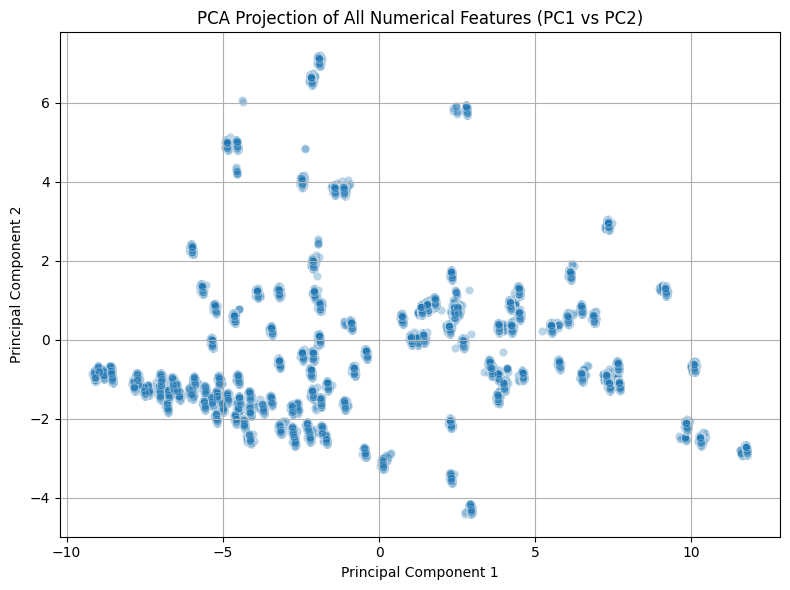

In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Select all numerical columns (no exclusions)
numeric_cols = clean_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Drop rows with missing values in any numeric column
pca_data = clean_df[numeric_cols].dropna()

# STEP 2: Standardize the data (mean=0, std=1)
scaler = StandardScaler()
pca_scaled = scaler.fit_transform(pca_data)

# STEP 3: Fit PCA
pca = PCA()
pca_components = pca.fit_transform(pca_scaled)

# STEP 4: Explained Variance Table
explained_var = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance': pca.explained_variance_ratio_.cumsum()
})
print("\nExplained Variance by Principal Component:")
print(explained_var.head(10))

# STEP 5: Component Loadings (Eigenvectors)
loadings = pd.DataFrame(
    pca.components_.T,
    index=numeric_cols,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))]
)
print("\nTop Loadings on First 5 Principal Components:")
print(loadings.iloc[:, :5].round(4))

# STEP 6: PCA Projection Plot (PC1 vs PC2)
pca_df = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.3)
plt.title('PCA Projection of All Numerical Features (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd

# Replace these with your actual file paths or names
file1 = "C:/Users/jr24440/Downloads/VIX_History.csv"
file2 = "C:/Users/jr24440/Downloads/UMCSENT.csv"

# Load Excel files into DataFrames
VIX = pd.read_csv(file1)
CSENT = pd.read_csv(file2)

# Preview the first few rows
print("First file:")
print(VIX.head())

print("\nSecond file:")
print(CSENT.head())


First file:
         DATE   OPEN   HIGH    LOW  CLOSE
0  01/02/1990  17.24  17.24  17.24  17.24
1  01/03/1990  18.19  18.19  18.19  18.19
2  01/04/1990  19.22  19.22  19.22  19.22
3  01/05/1990  20.11  20.11  20.11  20.11
4  01/08/1990  20.26  20.26  20.26  20.26

Second file:
  observation_date  UMCSENT
0       1952-11-01     86.2
1       1952-12-01      NaN
2       1953-01-01      NaN
3       1953-02-01     90.7
4       1953-03-01      NaN


In [49]:
# STEP 2: Ensure date column is datetime type
VIX['Date'] = pd.to_datetime(VIX['DATE'])
CSENT['Date'] = pd.to_datetime(CSENT['observation_date'])

# STEP 3: Resample or group to monthly (if needed)
# If multiple rows per month, we take mean
VIX_monthly = VIX.groupby(pd.Grouper(key='Date', freq='MS'))[VIX.select_dtypes(include='number').columns].mean().reset_index()
CSENT_monthly = CSENT.groupby(pd.Grouper(key='Date', freq='MS'))[CSENT.select_dtypes(include='number').columns].mean().reset_index()


# STEP 4: Load your existing ESG dataset (assuming it's already a DataFrame called `esg_df`)
# Make sure Date is datetime type
esg_df = clean_df
esg_df['Date'] = pd.to_datetime(esg_df['Date'])

# STEP 5: Merge both datasets on Date
merged = esg_df.merge(VIX_monthly, on='Date', how='left')
merged = merged.merge(CSENT_monthly, on='Date', how='left')

# Preview
print(merged.head())

  Instrument Company Common Name Country of Headquarters  \
0     1U1.DE              1&1 AG                 Germany   
1     1U1.DE              1&1 AG                 Germany   
2     1U1.DE              1&1 AG                 Germany   
3     1U1.DE              1&1 AG                 Germany   
4     1U1.DE              1&1 AG                 Germany   

                     TRBC Industry Name       Date  Aggregate  \
0  Wireless Telecommunications Services 2018-01-01   1.456280   
1  Wireless Telecommunications Services 2018-02-01   1.047459   
2  Wireless Telecommunications Services 2018-03-01   1.090466   
3  Wireless Telecommunications Services 2018-04-01   1.282268   
4  Wireless Telecommunications Services 2018-05-01   0.989691   

   cluster_Business Impact  cluster_Environmental Impact  \
0                 1.010773                      1.713863   
1                 0.866776                      1.125924   
2                 0.877460                      1.271126   
3       

In [50]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Step 1: Prepare the panel index
df_panel = merged.copy()
df_panel = df_panel.set_index(['Instrument', 'Date'])

# Step 2: Drop missing values in required columns
panel_cols = [
    'delta_esg',
    'Aggregate_lag1',
    'misinfo_count_normal_lag1',
    'cluster_Business Impact',
    'cluster_Environmental Impact',
    'cluster_Societal Debate',
    'cluster_Research',
    'total_tweets_normal',
    'total_tweets_misinfo',
    'UMCSENT',          # Consumer sentiment control
    'OPEN', 'HIGH', 'LOW', 'CLOSE'  # Financial VIX-related variables
]

df_panel_clean = df_panel[panel_cols].dropna()

# Step 3: Define dependent and independent variables
y = df_panel_clean['delta_esg']
X = df_panel_clean.drop(columns=['delta_esg'])

# Add constant term
X = sm.add_constant(X)

# Step 4: Run the panel regression
model = PanelOLS(y, X, entity_effects=True)
results = model.fit()

# Step 5: Display results
print(results.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:              delta_esg   R-squared:                        0.0070
Estimator:                   PanelOLS   R-squared (Between):              0.0316
No. Observations:              380530   R-squared (Within):               0.0070
Date:                Sun, Apr 06 2025   R-squared (Overall):              0.0072
Time:                        13:17:12   Log-likelihood                -7.767e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      203.89
Entities:                        5064   P-value                           0.0000
Avg Obs:                       75.144   Distribution:               F(13,375453)
Min Obs:                       1.0000                                           
Max Obs:                       130.00   F-statistic (robust):             203.89
                            

In [55]:
import pandas as pd

# Replace these with your actual file paths or names
CPU = "C:/Users/jr24440/Downloads/CPU index (1).csv"
EPU = "C:/Users/jr24440/Downloads/Global_Policy_Uncertainty_Data.xlsx"

# Load Excel files into DataFrames
CPU = pd.read_csv(CPU, header = 4)
EPU = pd.read_excel(EPU)

# Preview the first few rows
print("First file:")
print(CPU.head())

print("\nSecond file:")
print(EPU.head())


First file:
     date  cpu_index  old_cpu_index
0  Apr-87  43.589069            NaN
1  May-87  41.862022            NaN
2  Jun-87  71.135203            NaN
3  Jul-87  53.756704            NaN
4  Aug-87  60.615545            NaN

Second file:
   Year  Month  GEPU_current   GEPU_ppp
0  1997      1     74.761158  76.564586
1  1997      2     77.867158  80.031096
2  1997      3     67.042310  65.337960
3  1997      4     72.929775  74.763366
4  1997      5     71.817217  73.532121


In [56]:
# Convert 'date' column to datetime in format YYYY-MM-01
CPU['Date'] = pd.to_datetime(CPU['date'], format='%b-%y')
CPU['Date'] = CPU['Date'].dt.to_period('M').dt.to_timestamp()

In [57]:
# Combine Year and Month into a single datetime column
EPU['Date'] = pd.to_datetime(EPU[['Year', 'Month']].assign(DAY=1))


In [58]:
print(CPU.head())

     date  cpu_index  old_cpu_index       Date
0  Apr-87  43.589069            NaN 1987-04-01
1  May-87  41.862022            NaN 1987-05-01
2  Jun-87  71.135203            NaN 1987-06-01
3  Jul-87  53.756704            NaN 1987-07-01
4  Aug-87  60.615545            NaN 1987-08-01


In [59]:
print(EPU.head())

   Year  Month  GEPU_current   GEPU_ppp       Date
0  1997      1     74.761158  76.564586 1997-01-01
1  1997      2     77.867158  80.031096 1997-02-01
2  1997      3     67.042310  65.337960 1997-03-01
3  1997      4     72.929775  74.763366 1997-04-01
4  1997      5     71.817217  73.532121 1997-05-01


In [61]:
# Merge CPU first
merged_with_cpu = pd.merge(merged, CPU[['Date', 'cpu_index']], on='Date', how='left')

# Then merge EPU
merged_full = pd.merge(merged_with_cpu, EPU[['Date', 'GEPU_current', 'GEPU_ppp']], on='Date', how='left')

# Final result
print(merged_full.head())

  Instrument Company Common Name Country of Headquarters  \
0     1U1.DE              1&1 AG                 Germany   
1     1U1.DE              1&1 AG                 Germany   
2     1U1.DE              1&1 AG                 Germany   
3     1U1.DE              1&1 AG                 Germany   
4     1U1.DE              1&1 AG                 Germany   

                     TRBC Industry Name       Date  Aggregate  \
0  Wireless Telecommunications Services 2018-01-01   1.456280   
1  Wireless Telecommunications Services 2018-02-01   1.047459   
2  Wireless Telecommunications Services 2018-03-01   1.090466   
3  Wireless Telecommunications Services 2018-04-01   1.282268   
4  Wireless Telecommunications Services 2018-05-01   0.989691   

   cluster_Business Impact  cluster_Environmental Impact  \
0                 1.010773                      1.713863   
1                 0.866776                      1.125924   
2                 0.877460                      1.271126   
3       

In [62]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import pandas as pd

# Ensure Date and panel structure
merged_full['Date'] = pd.to_datetime(merged_full['Date'])
panel_df = merged_full.set_index(['Company Common Name', 'Date'])

# Define independent variables
independent_vars = [
    'Aggregate_lag1',
    'misinfo_count_normal_lag1',
    'cluster_Business Impact',
    'cluster_Environmental Impact',
    'cluster_Societal Debate',
    'cluster_Research',
    'total_tweets_normal',
    'total_tweets_misinfo',
    'UMCSENT',
    'OPEN', 'HIGH', 'LOW', 'CLOSE',
    'cpu_index',
    'GEPU_current'
]

# Drop missing values
panel_df = panel_df.dropna(subset=independent_vars + ['delta_esg'])

# Add constant
panel_df = panel_df.copy()
panel_df['const'] = 1

# Fit model
model = PanelOLS(
    panel_df['delta_esg'],
    sm.add_constant(panel_df[independent_vars]),
    entity_effects=True
).fit()

# Display summary
print(model.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:              delta_esg   R-squared:                        0.0089
Estimator:                   PanelOLS   R-squared (Between):              0.0379
No. Observations:              380530   R-squared (Within):               0.0089
Date:                Sun, Apr 06 2025   R-squared (Overall):              0.0092
Time:                        13:58:59   Log-likelihood                -7.763e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      225.35
Entities:                        5064   P-value                           0.0000
Avg Obs:                       75.144   Distribution:               F(15,375451)
Min Obs:                       1.0000                                           
Max Obs:                       130.00   F-statistic (robust):             225.35
                            

In [63]:
recent_esg = pd.read_excel("C:/Users/jr24440/Downloads/merged_dataset_ESG.xlsx")

In [64]:
print(recent_esg.head())

   Ticker Company Common Name Country of Exchange  \
0  1U1.DE              1&1 AG             Germany   
1  1U1.DE              1&1 AG             Germany   
2  1U1.DE              1&1 AG             Germany   
3  1U1.DE              1&1 AG             Germany   
4  1U1.DE              1&1 AG             Germany   

      TRBC Industry Group Name  Company Market Cap  ESG Score  \
0  Telecommunications Services         2788.711739  34.932175   
1  Telecommunications Services         2788.711739  42.295216   
2  Telecommunications Services         2788.711739  58.497492   
3  Telecommunications Services         2788.711739  69.198438   
4  Telecommunications Services         2788.711739  69.940814   

   ESG Combined Score  Environmental Pillar Score  Social Pillar Score  \
0           34.932175                   39.433142            37.899445   
1           42.295216                   45.422365            46.492585   
2           58.497492                   49.344504            69.3151

In [72]:
print(recent_esg.describe())

       Company Market Cap     ESG Score  ESG Combined Score  \
count        1.662800e+04  16628.000000        16628.000000   
mean         2.185141e+04     57.146214           54.751799   
min          1.563216e-04      3.479549            3.479549   
25%          8.486039e+02     44.954619           43.124081   
50%          3.135419e+03     58.394845           55.584509   
75%          1.205790e+04     70.520675           67.280473   
max          3.331340e+06     95.874190           94.702085   
std          1.175848e+05     17.443869           16.632292   

       Environmental Pillar Score  Social Pillar Score  \
count                16628.000000         16628.000000   
mean                    54.252519            60.033703   
min                      0.000000             0.313364   
25%                     36.435559            45.697951   
50%                     55.816831            61.925523   
75%                     72.743354            75.925086   
max                     98

In [65]:
print(df_merged.head())

        Date  Aggregate  cluster_Business Impact  \
0 2012-01-01   0.726099                 0.662646   
1 2012-02-01   0.633156                 0.674654   
2 2012-03-01   0.741696                 0.702173   
3 2012-04-01   0.696257                 0.725261   
4 2012-05-01   0.646961                 0.622659   

   cluster_Environmental Impact  cluster_Societal Debate  cluster_Research  \
0                      0.757232                 0.623863          0.725238   
1                      0.571445                 0.801655          0.554006   
2                      0.880664                 0.787672          0.753214   
3                      0.639356                 0.608206          0.497776   
4                      0.611470                 0.570841          0.609736   

   Agreements/Actions  Agriculture Shifts  Airline Industry  Arctic Wildlife  \
0            0.516620            1.287339          1.662062         0.221007   
1            0.425696            0.708113          1.55524

In [66]:
import pandas as pd

# Ensure 'Date' is a datetime object
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Extract year
df_merged['year'] = df_merged['Date'].dt.year

# Determine which columns to average and which to sum
# Typically, 'count' or 'total' columns should be summed
sum_cols = [
    'total_tweets_normal', 
    'misinfo_count_normal', 
    'total_tweets_misinfo', 
    'misinfo_count_misinfo'
]

# The rest (e.g., sentiment/salience scores) should be averaged
mean_cols = [col for col in df_merged.columns 
             if col not in ['Date', 'year'] + sum_cols]

# Aggregate
mccc_yearly = df_merged.groupby('year').agg({**{col: 'mean' for col in mean_cols},
                                           **{col: 'sum' for col in sum_cols}}).reset_index()

# Preview
print(mccc_yearly.head())


   year  Aggregate  cluster_Business Impact  cluster_Environmental Impact  \
0  2012   0.815155                 0.704255                      0.909199   
1  2013   0.993534                 0.878402                      1.030799   
2  2014   1.202209                 1.070362                      1.192136   
3  2015   1.412653                 1.317144                      1.251270   
4  2016   1.224137                 1.094929                      1.204568   

   cluster_Societal Debate  cluster_Research  Agreements/Actions  \
0                 0.725138          0.779481            0.611317   
1                 0.813596          0.964035            0.740274   
2                 1.064518          1.174610            1.044164   
3                 1.492457          1.147044            1.144543   
4                 1.217427          0.970549            0.870675   

   Agriculture Shifts  Airline Industry  Arctic Wildlife  ...  \
0            0.654449          1.005782         0.420606  ...  

In [68]:
import pandas as pd
import numpy as np

# Ensure datetime format
recent_esg['snapshot_date'] = pd.to_datetime(recent_esg['snapshot_date'])
recent_esg['year'] = recent_esg['snapshot_date'].dt.year

# Merge with MCCC yearly data
merged = recent_esg.merge(mccc_yearly, on='year', how='left')

# Sort and create lagged ESG score (for dynamic GMM)
merged = merged.sort_values(['Ticker', 'year'])
merged['esg_lag'] = merged.groupby('Ticker')['ESG Score'].shift(1)

# (Optional) Log-transform emissions and market cap if needed
merged['log_emissions'] = pd.to_numeric(merged['CO2 Equivalent Emissions Total'], errors='coerce').apply(lambda x: np.log1p(x) if pd.notnull(x) else x)
merged['log_market_cap'] = pd.to_numeric(merged['Company Market Cap'], errors='coerce').apply(lambda x: np.log1p(x) if pd.notnull(x) else x)

# Drop rows with missing key values
merged_clean = merged.dropna(subset=[
    'ESG Score', 'esg_lag', 'misinfo_count_normal', 'misinfo_count_normal', 'log_market_cap', 'log_emissions'
])


In [69]:
from linearmodels.iv import IVGMM
import numpy as np

# Create instruments (1-period lag of endogenous variables)
merged_clean['esg_lag2'] = merged_clean.groupby('Ticker')['esg_lag'].shift(1)
merged_clean['misinfo_lag'] = merged_clean.groupby('Ticker')['misinfo_count_normal'].shift(1)

# Drop NAs again after lagging
gmm_df = merged_clean.dropna(subset=['esg_lag2', 'misinfo_lag'])

# Add constant
gmm_df['const'] = 1

# Define variables
dependent = gmm_df['ESG Score']

# Endogenous regressors
endog = gmm_df[['esg_lag', 'misinfo_count_normal']]

# Exogenous regressors
exog = gmm_df[['const', 'log_market_cap', 'log_emissions']]

# Instruments
instruments = gmm_df[['esg_lag2', 'misinfo_lag']]

# Run GMM
gmm_model = IVGMM(dependent, exog, endog, instruments).fit()
print(gmm_model.summary)


                          IV-GMM Estimation Summary                           
Dep. Variable:              ESG Score   R-squared:                      0.8891
Estimator:                     IV-GMM   Adj. R-squared:                 0.8891
No. Observations:                8509   F-statistic:                 5.766e+04
Date:                Wed, Apr 09 2025   P-value (F-stat)                0.0000
Time:                        16:08:46   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
const                    3.8995     0.3376     11.550     0.0000      3.2378      4.5612
log_market_c

C:\Users\jr24440\AppData\Local\Temp\ipykernel_11304\3356216428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean['esg_lag2'] = merged_clean.groupby('Ticker')['esg_lag'].shift(1)
C:\Users\jr24440\AppData\Local\Temp\ipykernel_11304\3356216428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean['misinfo_lag'] = merged_clean.groupby('Ticker')['misinfo_count_normal'].shift(1)
C:\Users\jr24440\AppData\Local\Temp\ipykernel_11304\3356216428.py:12: SettingWithCopyWarning: 
A value is tryi